# Iris Flower Classification Project for Data Science

## Introduction

I need a job. In order to get a job in our modern times, you can't simply have a M.Sc., or even a Ph.D.  <br/>
No, what you need are **Projects**, because otherwise, whose going to know that you can write code? <br/>
I'm currently a student for a M. Sc. in applied mathematics, and I've been interested in data science for quite some time since it involves several interests of mine, like numerical analysis, probability, linear algebra, etc. Although the theoretical background behind data science is interesting, almost nobody in the industry really cares. <br/>

## Project Objective

The objective of this project is mainly to understand the basics of data science, or at least, understand how to analyze and visualize data, while also developing machine learning models for classification problems. <br/>
I've started on the Iris flower dataset, which beginners widely use (originally used by Ronald Fischer in 1936). I thought it would be a good start for me given its lower sample size and its widespread use. <br/>
For now, this is a work in progress, until I feel like I've done all the basic things I can do. I'll probably add machine learning models in the future, as well as embellishing and adding more information on my project if needed.

## 1. Understanding the data

Before we start working with the dataset itself, we need the following libraries: <br/>
* **NumPy** - Used for scientific computation.
* **Pandas** - Used for data manipulation and analysis.
* **Matplotlib.pyplot** - Used for visualizing plots and charts.
* **Seaborn** - Used for statsitical data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A very useful library to help us with analyzing our data will be **Scikit-learn**, and it shall be used sporadically throughout this project when we want to apply a specific ML model to our data.

We have saved our dataset as "IRIS.csv". In order to apply it on our code, we simply write:

In [2]:
data = pd.read_csv('IRIS.csv')

To first look at the data we have, we write:

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We find that we have the following data columns: **sepal length**, **sepal width**, **petal length**, **petal width**, and **species**. </br> 
We can find more information about the data by simply writing:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see that we have 150 entries, without any missing data. The data type used for the lengths and widths is float (the units are in centimeters), but with species we have "object", referring to string type.

Although this already shows us that we have no null values in our dataset, we could find out about missing values by using the command:

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*Explanation:* The command .isnull() generates a boolean dataframe, where an entry is True if it's null, and False if it isn't. The command .sum() returns the sum of the values. Each True entry is valued 1, and each False entry is valued 0. 

Additionaly, we may want to check if there are any duplicate rows in our data. In order to check that, we simply do:

In [6]:
data.duplicated().sum()

np.int64(3)

We have 3 duplicated rows! To find which rows are duplicated, we write:

In [7]:
data[data.duplicated(keep = False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


*Explanation:* The command data.duplicated(keep = False) gives a boolean dataframe, where True indicates a duplicate row, and False indicates a unqiue row.

In [8]:
data.duplicated(keep = False)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

By inserting the above command inside the data, as we did in line 13, we get all the duplicated rows.

If we want to use a dataset without any duplications, we write:

In [9]:
clean_data = data.drop_duplicates()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


For consistency, we'll use the original dataset, until otherwise specified.

So far, we know that our dataset has 150 rows and 5 columns, without any null values, and 3 duplicated rows. <br/> 
Next, we want to check the statistics of our data. To do so, we write:

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The function .describe() brings us the following statistics for each column:

* **count** - The number of non-null values.
* **mean** - The average value.
* **std** - The standard deviation. i.e., spread of data (variance = std squared)
* **min** - The minimum value.
* **25%** - The 25th percentile (first quartile).
* **50%** - The 50th percentile (median).
* **75%** - The 75th percentile (third quartile).
* **max** - The maximam value.

We can include additional information for strings by using the command:


In [11]:
data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Which brings us:
* **unique** - The number of distinct values.
* **top** - The most frequently occurring value.
* **freq** - The frequency of the most frequently occurring value.

From the above chart we can determine that there are 3 unique species, each appearing 50 times. <br/>
Although .describe() doesn't give us the unique values of the numerical columns, we can still find them by writing:

In [12]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

We could've also derived the number of unique species by writing:

In [13]:
data["species"].nunique()

3

To examine the unique species, we write:

In [14]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So there are three species in our data: Iris Setosa, Iris Versicolor, and Iris Virginicia. <br/>
Since it's clear to us the species is always of the "iris" genus, we can change the data to include only the species type:

In [15]:
data['species'] = data['species'].replace(
                       ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                       ['setosa', 'versicolor', 'virginica'])
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 2. Visualizing the data

Now it's time to visualize our data. To view the histogram (i.e., the distrubtion of the data), we simply write:

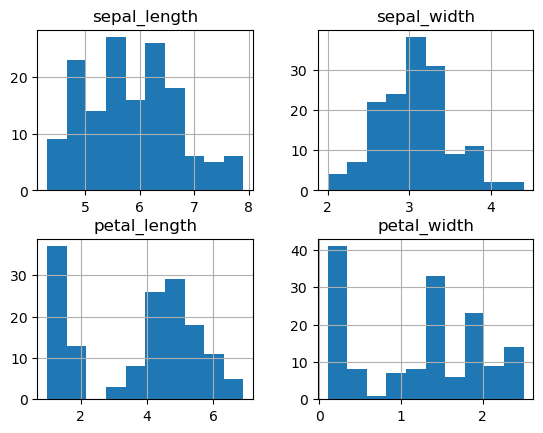

In [16]:
data.hist();

*Note:* when using the default data.hist(), an array output also shows up. The added semicolumn suppresses that array. </br>
The default number of bins is 10, though we can change the number of bins by writing:

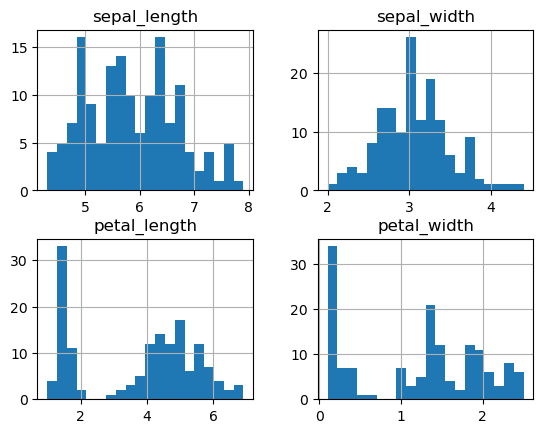

In [17]:
data.hist(bins = 20);

*Note:* While there's no universal method to determine what's the "best" number of bins, there are several formulas which are widely used to determine the optional number of bins, given $n$ data points, such as the square-root choice $\lceil \sqrt{n} \rceil $ and Struges's formula $\lceil \log_2(n) + 1 \rceil$. Since our number of data points is relatively small ($n = 150$), we will default to 10 bins.

We can use Seaborn to plot pairwise relationships between data. 

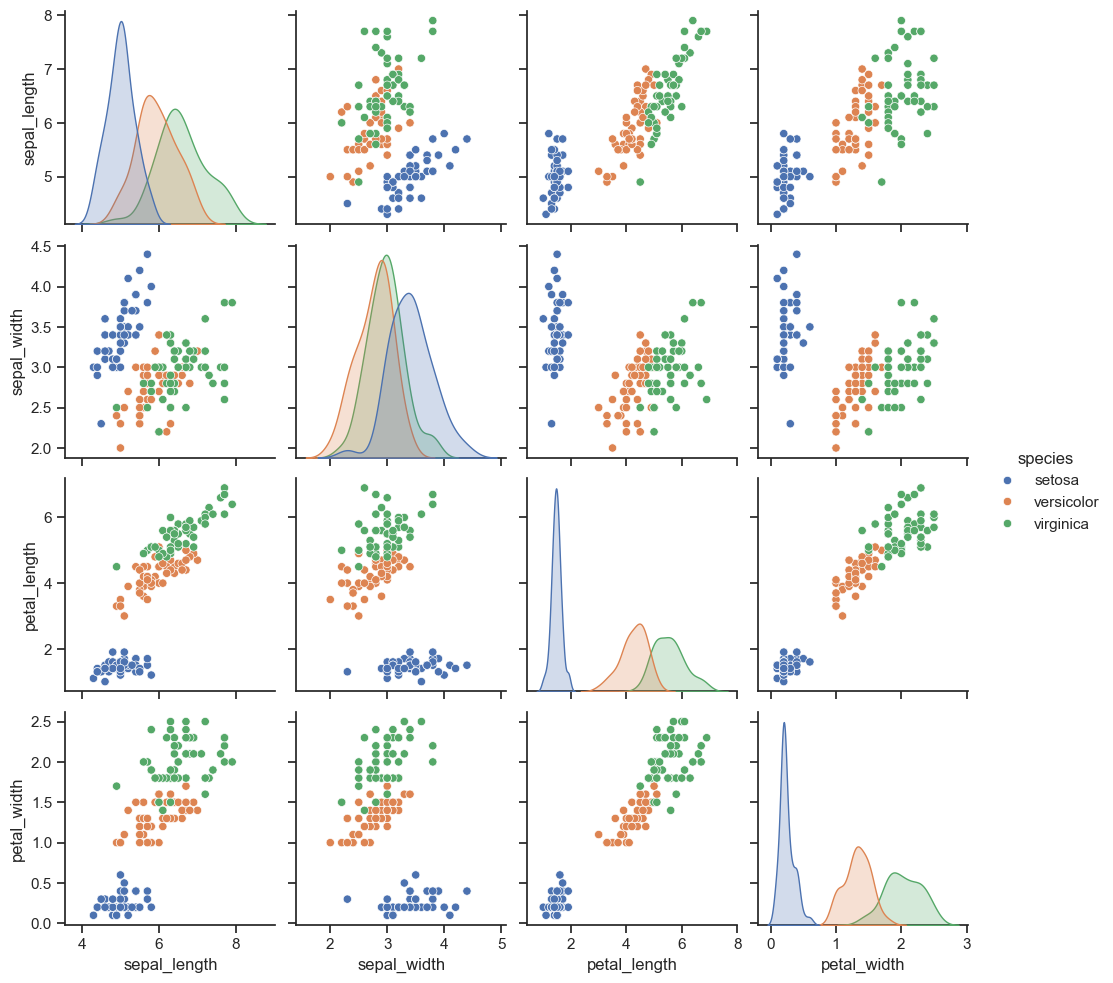

In [18]:
sns.set(style = "ticks")
sns.pairplot(data, hue = "species");

The plots on the diagonal are layered kernel density estimations (KDEs). These operate much like histograms, but create more "interpretable" plots. <br/> 
We can instead replace them with histograms:

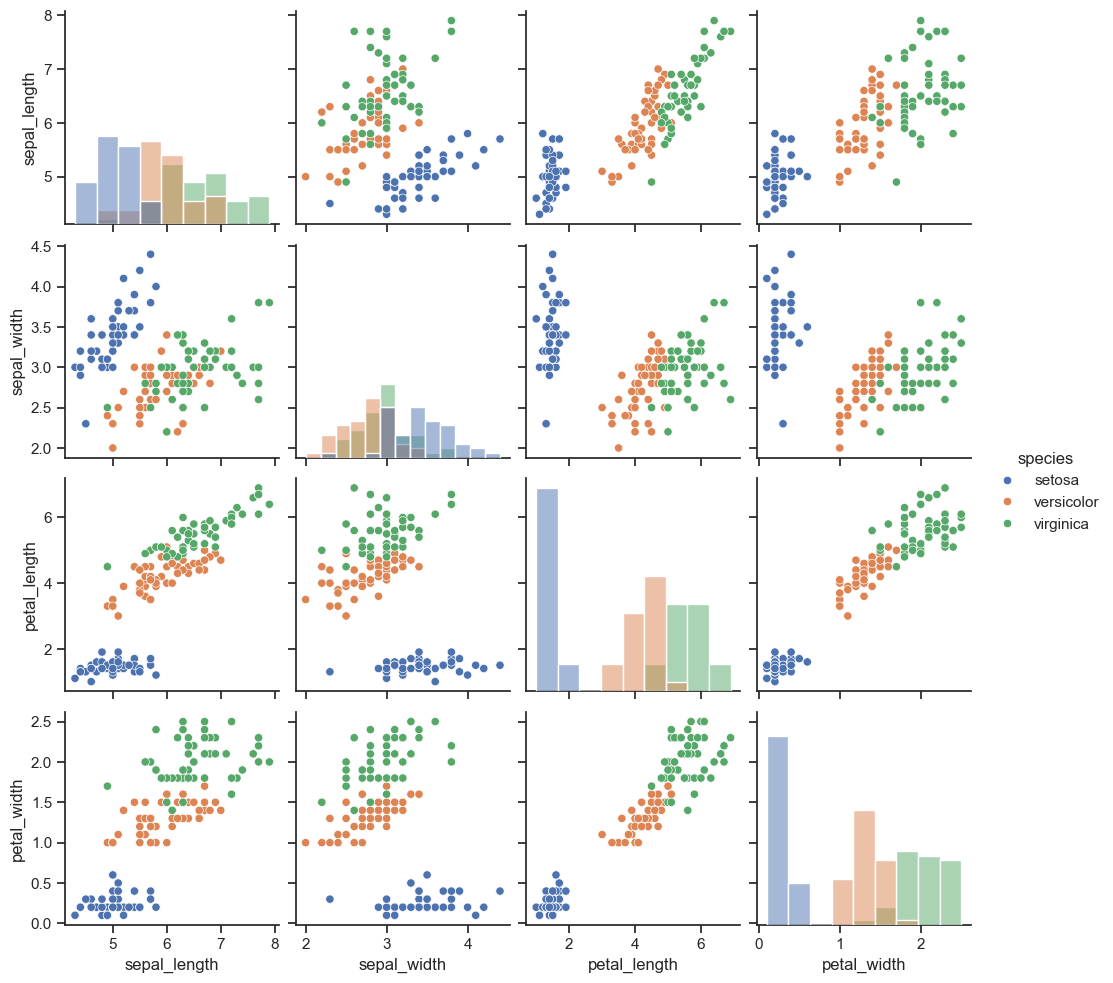

In [19]:
sns.pairplot(data, hue = "species", diag_kind = "hist");

If we want to specify, say, the speal length vs sepal width, we simply write:

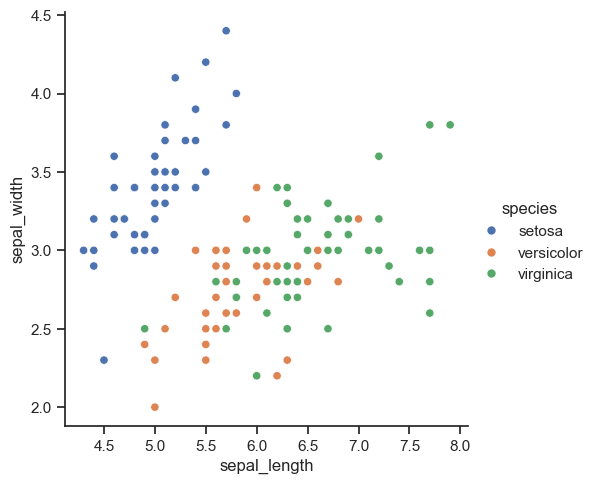

In [20]:
sns.relplot(data, x ="sepal_length", y = "sepal_width", hue = "species");

And for petal length vs petal width:

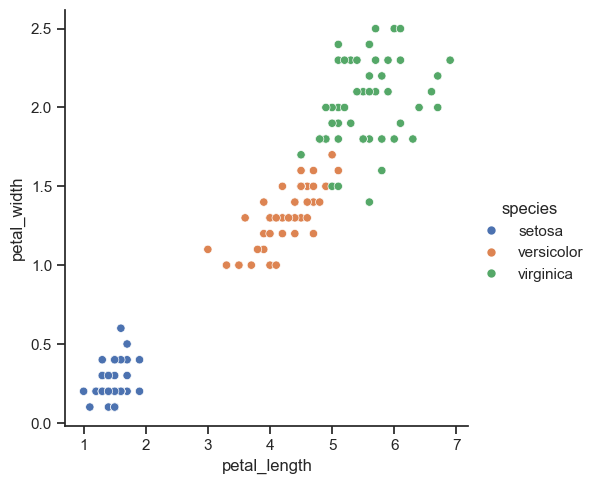

In [21]:
sns.relplot(data, x ="petal_length", y = "petal_width", hue = "species");

From the given visualization, we can already distinguish between the Iris Setosa species, and seems like we can differentiate between the Iris Versicolor and Iris Virginica, if we follow plots like petal length vs petal wdith, or petal length vs sepal width. This may help us understand the right prediction model for the given data.

Another useful tool in analyzing our data is the correlation matrix. This matrix helps us understand the relationship between each of the variables in our dataset. <br/>
Given a paired dataset $\{ (x_1, y_1), ..., (x_n, y_n) \}$, the sample correlation coefficient $r_{xy}$ is defined as:

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sigma_x \sigma_y}$$

Where:
* $n$ is the sample size
*  $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ is the sample mean of $x = \{x_1 ,..., x_n \}$
*  $\sigma_x = \sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}$ is the standard deviation of $x$

From the definition of the correlation coefficient, we can derive that $r_{xy}$ is valued from $-1$ to $1$. If $x = y$, then $r_{xx} = 1$. <br/> This coefficient helps us determinne which variables are correlated, given that:
* If $r_{xy} = 1$, then the relationship is postively strong (i.e., all the points lie on a straight line with a positive slope).
* If $r_{xy} = -1$, then the relationship is negatively strong (i.e., all the points lie on a straight line with a negative slope).
* If $r_{xy} = 0$, then there's no linear depedency between the variables. <br/>
This means that, for example, if $r_{xy}$ is very close to 1 or to -1, that means that $x$ and $y$ are almost linearly dependant. <br/>

The correlation matrix has the correlation coefficient of each of its data columns. From the definition, we can conclude that it's a symmetric matrix, whose values at the diagonal are all 1. Although we have a function .corr() to create the matrix, it only works on dataframes with float dataype. Thus, if we would've applied the function to our data, we would get a value error:

In [37]:
correlation_matrix = data.corr()

ValueError: could not convert string to float: 'setosa'

That is why we need to delete the column "species", by using the function .drop, like so:

In [23]:
correlation_matrix = data.drop(columns = ['species']).corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


It's more convenient to visualize the correlation matrix using a heatmap:

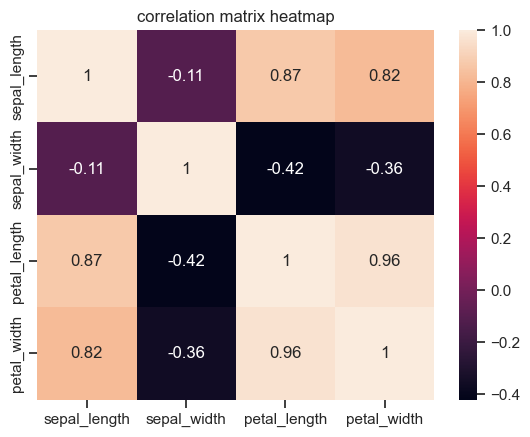

In [24]:
sns.heatmap(correlation_matrix, annot = True)
plt.title("correlation matrix heatmap");

Notice that the correlation matrix is symmetric, and the values at the diagonal are always 1. Thus, we can simplify the heatmap by converting the matrix to an upper triangular matrix, with the data still being preserved. <br/>
First, we make a matrix with only the value 1, which has the same size as the correlation matrix:

In [25]:
print(np.ones_like(correlation_matrix))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Next, we isolate the matrix into an upper triangular matrix, like so:

In [26]:
print(np.triu(np.ones_like(correlation_matrix)))

[[1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]


Now we can convert the matrix into a boolean matrix, like so:

In [27]:
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
print(mask)

[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


Using it on our heatmap, we get:

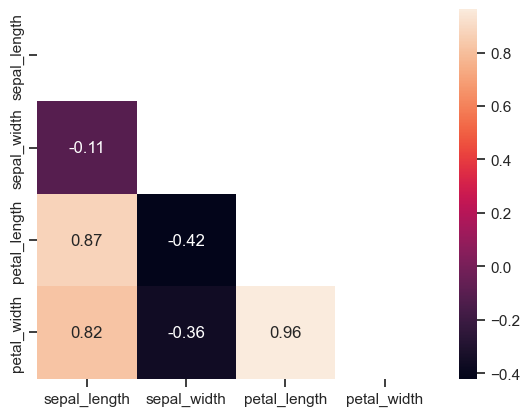

In [28]:
sns.heatmap(correlation_matrix, mask = mask, annot = True);

We can conclude from this graph that there's a strong linear dependence between:
* petal length and petal width ($r_{xy} = 0.96$)
* petal length and sepal length ($r_{xy} = 0.87$)
* petal width and sepal length ($r_{xy} = 0.82$)

This is going to help us with using linear models for the specified relations.

# 3. Machine Learning Models

Now this is where the fun begins. We'll start using machine learning models in order to create a predictive model of a specific species given the values of its petal length and width, and its sepal length and width. 

First, we want to determine the input (X) and output (Y) values. These are also called "features" and "labels" respectively, and we can name our variables like that. For convenience sake, we'll stick with the "x" and "y" symbols.

In [29]:
X = data.drop(['species'], axis = 1) # features
Y = data['species'] # labels
print("features", X)
print("labels", Y)

features      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
labels 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


*Note:* we could change our Y data to have numerical labels, using the LabelEncoder module from sklearn, which encodes label values.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
numerical_species_data = le.fit_transform(data['species'])
numerical_species_data    # numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
unique_species = np.unique(numerical_species_data)
print(unique_species)

[0 1 2]


But for our purposes, we'll maintain the original string column for the species.

Now we're going to split the data into train and test sets: <br/>
* **Train set** is the dataset on which the model is trained.
* **Test set** is the dataset that is utlized to give an accurate evaluation of a given model. <br/>
We'll use the function train_test_split() from the sklearn module. The function divides the features (x) and labels (y) into train sets (X_train, Y_train) and test sets (X_test, Y_test)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2)

# printing the train and test sets
print('X_train')
print(X_train.head())
print(X_train.shape)

print('')
print('X_test')
print(X_test.head())
print(X_test.shape)

print('')
print('Y_train')
print(Y_train.head())
print(Y_train.shape)

print('')
print('Y_test')
print(Y_test.head())
print(Y_test.shape)

X_train
    sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2
(120, 4)

X_test
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
(30, 4)

Y_train
22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: species, dtype: object
(120,)

Y_test
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
Name: species, dtype: object
(30,)


*Explanation:*
* test_size determins the proporiton of the dataset to include in the test split. In our case, 20% of our data (30 out of 150) is used for testing.
* random_state controls the random number generator used. If we use the default setting, we can get random training sets each time:

In [33]:
for i in range(3): 
    X_train = train_test_split(X, Y)[0]
    print(X_train.head())

    sepal_length  sepal_width  petal_length  petal_width
79           5.7          2.6           3.5          1.0
20           5.4          3.4           1.7          0.2
87           6.3          2.3           4.4          1.3
30           4.8          3.1           1.6          0.2
91           6.1          3.0           4.6          1.4
     sepal_length  sepal_width  petal_length  petal_width
13            4.3          3.0           1.1          0.1
128           6.4          2.8           5.6          2.1
20            5.4          3.4           1.7          0.2
94            5.6          2.7           4.2          1.3
38            4.4          3.0           1.3          0.2
     sepal_length  sepal_width  petal_length  petal_width
42            4.4          3.2           1.3          0.2
51            6.4          3.2           4.5          1.5
83            6.0          2.7           5.1          1.6
118           7.7          2.6           6.9          2.3
25            5.0   

By determining the random_state, we ensure the reproduciblity of the split, and we'll get the same train-test split every time we're running the code. This is important if we want our experimentation to be consistent. Usually, the random_state is valued at either 0 or 42 ("The answer to the Ultimate Question of Life, the Universe, and Everything").

### 3.1 Logistic Regression

The first model that we're going to implement to our data is the logistic regression model. <br/>
I'll probably explain the details of logistic regression model, but for now we'll consider it as a "black box" to fit our data with <br/>
Thankfully, sklearn has the logistic regression function at hand:

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)

# fit the model with data
logreg.fit(X_train, Y_train)

Y_pred_train = logreg.predict(X_train)
Y_pred_test = logreg.predict(X_test)

To test the accuracy of our model, we can simply use the accuracy_score function from sklearn.metrics library. <br/>
The function gives us a fraction of the correct predictions:

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, Y_pred_train)

0.975

From here, we can conclude that the model is accurate for 97.5% of our train dataset, or 117 correct predictions.

One important tool in analyzing a model's predictive power is with the **confusion matrix**. <br/>
In such a matrix, each row represents instances of a true class, while each column represents instances of a predicted class. The diagonal of the matrix represent all instances which are correctly predicted. <br/>
We can create a confusion matrix for our model using the sklearn.metrics library:

In [46]:
from sklearn.metrics import confusion_matrix
cnf_matrix_train = confusion_matrix(Y_train, Y_pred_train)
cnf_matrix_test = confusion_matrix(Y_test, Y_pred_test)
print("Confusion Matrix for Train: \n", cnf_matrix_train)
print("")
print("Confusion Matrix for Test: \n", cnf_matrix_test)

Confusion Matrix for Train: 
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]

Confusion Matrix for Test: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


If we'll visualize, say, the training confusion matrix using heatmap, we get:

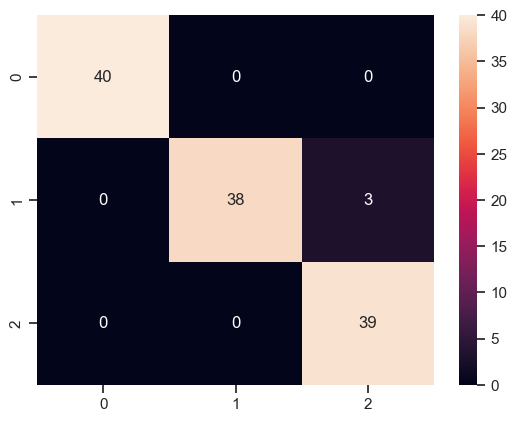

In [44]:
sns.heatmap(cnf_matrix_train, annot = True);

To make the heatmap more readable, we'll convert the training confusion matrix into a dataframe:

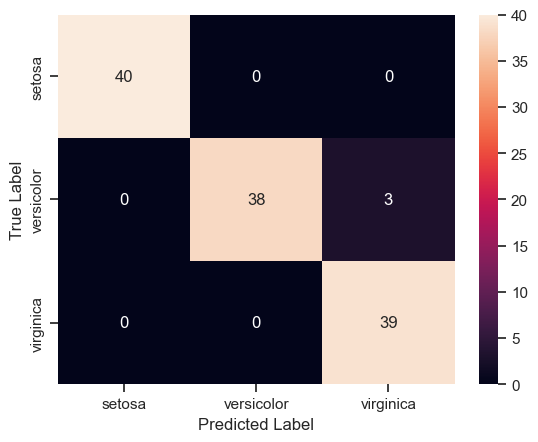

In [43]:
cnf_matrix_train_df = pd.DataFrame(cnf_matrix_train,
                                   index = ['setosa', 'versicolor', 'virginica'],
                                   columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cnf_matrix_train_df, annot = True);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This shows us that the model is accurate for classifing setosa (40 out of 40), but lower for versicolor (38 out of 40, or 95% accurate). <br/>
Notice, however, that we have a case of false negatives: 3 instances of versicolor have been predicted as being virginica.

We'll do the same thing for the test confusion matrix:

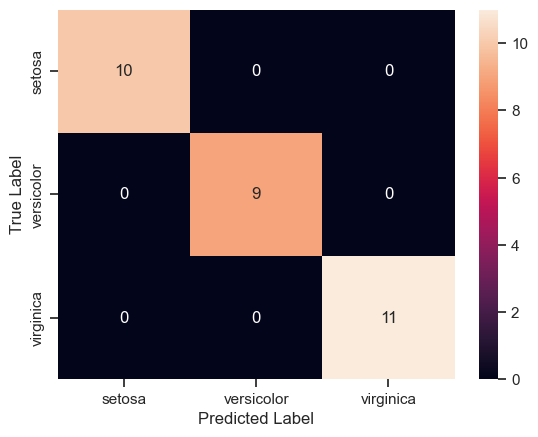

In [45]:
cnf_matrix_test_df = pd.DataFrame(cnf_matrix_test,
                                   index = ['setosa', 'versicolor', 'virginica'],
                                   columns = ['setosa', 'versicolor', 'virginica'])
sns.heatmap(cnf_matrix_test_df, annot = True);
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Which gives us a perfect result.